In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('../scripts')
from utils import split_annotations
os.chdir('../experiments')

In [2]:
annotations_mini_path = Path('../data/annotations/annotations_mini.xlsx')
target_dir_path = Path('../data/annotations/splits/three/10_20/mini/')

In [3]:
# Split the annotations mini file into train, validation and test annotations files
# test_ratio = 0.1, val_ratio = 0.2 (values by default)
split_annotations(annotations_mini_path, target_dir_path)

# Read the previous three created .xlsx files into dataframes
train_df = pd.read_excel(target_dir_path / 'train_annotations.xlsx')
val_df = pd.read_excel(target_dir_path / 'val_annotations.xlsx')
test_df = pd.read_excel(target_dir_path / 'test_annotations.xlsx')

len(train_df), len(val_df), len(test_df)

(216, 54, 30)

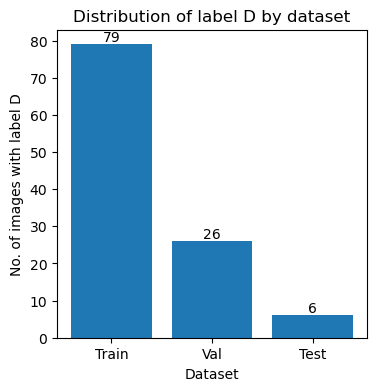

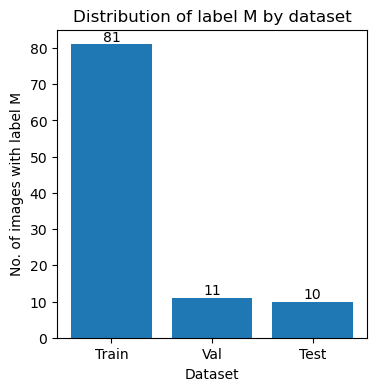

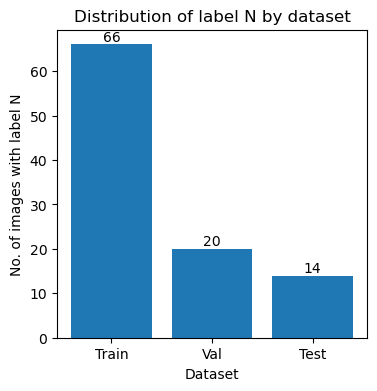

In [5]:
label_names = ['D','M','N']

for i, label in enumerate(label_names):
    plt.figure(figsize=(4,4))
    
    total_label_train = int(train_df.loc[:, [label]].sum())
    total_label_val = int(val_df.loc[:, [label]].sum())
    total_label_test = int(test_df.loc[:, [label]].sum())
    
    bar = plt.bar(['Train', 'Val', 'Test'], [total_label_train, total_label_val, total_label_test])

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

    plt.xlabel(f'Dataset')
    plt.ylabel(f'No. of images with label {label}')
    plt.title(f'Distribution of label {label} by dataset')